In [1]:
## Import Libraries and Excel files

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

dfBikes = pd.read_excel('bikes.xlsx') 
dfBikeShops = pd.read_excel('bikeshops.xlsx') 
dfOrders = pd.read_excel('orders.xlsx') 

# Step 1

In [2]:
dfBikes.head()

,bike.id,model,category1,category2,frame,price
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790
1,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660
2,3,Supersix Evo Hi-Mod Dura Ace 1,Road,Elite Road,Carbon,7990
3,4,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,5330
4,5,Supersix Evo Hi-Mod Utegra,Road,Elite Road,Carbon,4260


In [3]:
dfBikeShops.head()

,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Pittsburgh Mountain Machines,Pittsburgh,PA,40.440625,-79.995886
1,2,Ithaca Mountain Climbers,Ithaca,NY,42.443961,-76.501881
2,3,Columbus Race Equipment,Columbus,OH,39.961176,-82.998794
3,4,Detroit Cycles,Detroit,MI,42.331427,-83.045754
4,5,Cincinnati Speed,Cincinnati,OH,39.103118,-84.512020


In [4]:
dfOrders.head()

,order.id,order.line,order.date,customer.id,product.id,quantity
1,1,1,2011-01-07,2,48,1
2,1,2,2011-01-07,2,52,1
3,2,1,2011-01-10,10,76,1
4,2,2,2011-01-10,10,52,1
5,3,1,2011-01-10,6,2,1


In [5]:
## Combine all the 3 files in a single dataframe
dfCombined = dfBikes.merge(right = dfOrders, left_on = 'bike.id', right_on = 'product.id')
dfCombined = dfCombined.merge(right = dfBikeShops, left_on = 'customer.id', right_on = 'bikeshop.id')
dfCombined.head(10)

,bike.id,model,category1,category2,frame,price,order.id,order.line,order.date,customer.id,product.id,quantity,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,3,3,2011-01-10,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
1,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,458,2,2012-05-07,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
2,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,469,2,2012-05-18,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
3,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,556,12,2012-08-07,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
4,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,1178,8,2014-03-27,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
5,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,1289,2,2014-06-10,6,1,4,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
6,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,1637,4,2015-04-06,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
7,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,1679,7,2015-04-24,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
8,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,12790,1771,5,2015-06-16,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
9,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,10660,3,1,2011-01-10,6,2,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456


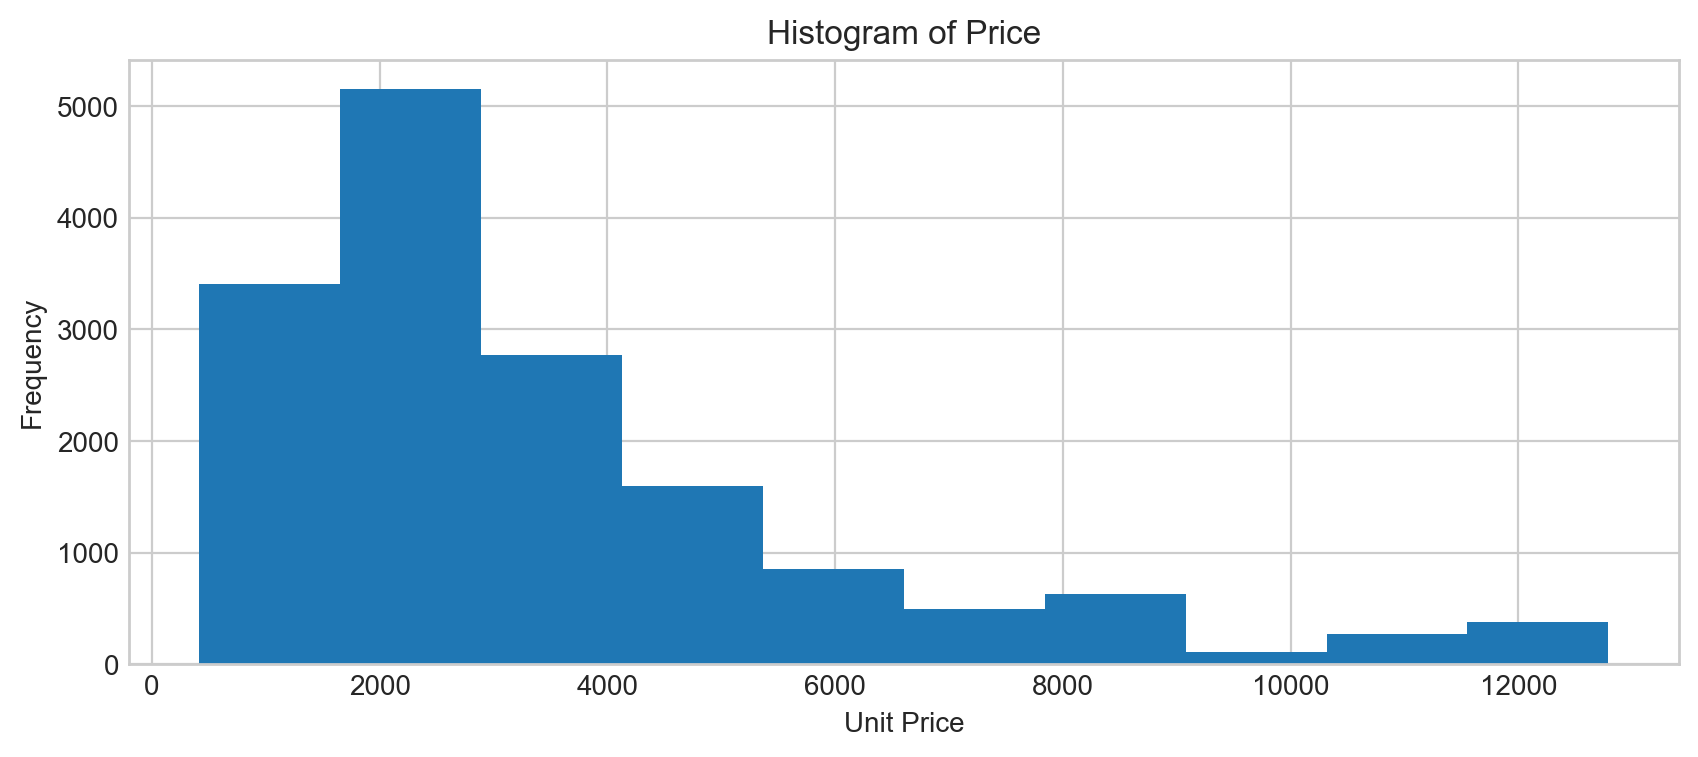

In [6]:
## Plot the Distribution of Price with a Histogram
figure(num=None, figsize=(10, 4), dpi=200)

plt.style.use('seaborn-whitegrid')
plt.hist(dfCombined['price'], orientation = 'vertical')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

In [7]:
print('Median of the Unit Price is: ' + str(dfCombined['price'].median()))
print('Mean of the Unit Price is: ' + str(round(dfCombined['price'].mean(),2)))

Median of the Unit Price is: 2700.0
Mean of the Unit Price is: 3521.11


In [8]:
## Convert Price from Numeric to Categorical Variable by splitting it on Median
dfCombined['price'] = np.where(dfCombined['price'] > (dfCombined['price'].median()), 'high', 'low')
dfCombined.head(10)

,bike.id,model,category1,category2,frame,price,order.id,order.line,order.date,customer.id,product.id,quantity,bikeshop.id,bikeshop.name,bikeshop.city,bikeshop.state,latitude,longitude
0,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,3,3,2011-01-10,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
1,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,458,2,2012-05-07,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
2,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,469,2,2012-05-18,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
3,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,556,12,2012-08-07,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
4,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,1178,8,2014-03-27,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
5,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,1289,2,2014-06-10,6,1,4,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
6,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,1637,4,2015-04-06,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
7,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,1679,7,2015-04-24,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
8,1,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,1771,5,2015-06-16,6,1,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456
9,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,high,3,1,2011-01-10,6,2,1,6,Louisville Race Equipment,Louisville,KY,38.252665,-85.758456


In [9]:
## Find out total quantity of bikes sold per customer in order to calculate proportion
dfGroupedByForProp = dfCombined.groupby(by = ['bikeshop.name']).agg({'quantity':'sum'})
dfGroupedByForProp.head(10)

,quantity
bikeshop.name,
Albuquerque Cycles,286
Ann Arbor Speed,602
Austin Cruisers,246
Cincinnati Speed,391
Columbus Race Equipment,394
Dallas Cycles,234
Denver Bike Shop,2301
Detroit Cycles,504
Indianapolis Velocipedes,319


In [10]:
## Group the data By Customer Name, Model, Category, Frame and Price
dfGroupedBy = dfCombined.groupby(by = ['bikeshop.name', 'model', 'category1', 'category2','frame','price']).agg({'quantity':'sum'})
dfGroupedBy.head(10)

quantity
bikeshop.name      model                category1 category2  frame    price          
Albuquerque Cycles Bad Habit 1          Mountain  Trail      Aluminum high          5
                   Bad Habit 2          Mountain  Trail      Aluminum low           2
                   Beast of the East 1  Mountain  Trail      Aluminum high          3
                   Beast of the East 2  Mountain  Trail      Aluminum low           3
                   Beast of the East 3  Mountain  Trail      Aluminum low           1
                   CAAD Disc Ultegra    Road      Elite Road Aluminum low           4
                   CAAD12 105           Road      Elite Road Aluminum low           2
                   CAAD12 Disc 105      Road      Elite Road Aluminum low           4
                   CAAD12 Disc Dura Ace Road      Elite Road Aluminum high         14
                   CAAD12 Red           Road      Elite Road Aluminum high          4

In [11]:
## Create a Pivot table of the aggregated Data
pivotT = dfGroupedBy.pivot_table(index='bikeshop.name', columns=['model', 'category1', 'category2', 'frame', 'price'], values='quantity', aggfunc='sum')
pivotT.head(10)

model,Bad Habit 1,Bad Habit 2,Beast of the East 1,Beast of the East 2,Beast of the East 3,CAAD Disc Ultegra,CAAD12 105,CAAD12 Black Inc,CAAD12 Disc 105,CAAD12 Disc Dura Ace,...,Synapse Sora,Trail 1,Trail 2,Trail 3,Trail 4,Trail 5,Trigger Carbon 1,Trigger Carbon 2,Trigger Carbon 3,Trigger Carbon 4
category1,Mountain,Mountain,Mountain,Mountain,Mountain,Road,Road,Road,Road,Road,...,Road,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain
category2,Trail,Trail,Trail,Trail,Trail,Elite Road,Elite Road,Elite Road,Elite Road,Elite Road,...,Endurance Road,Sport,Sport,Sport,Sport,Sport,Over Mountain,Over Mountain,Over Mountain,Over Mountain
frame,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,...,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Carbon,Carbon,Carbon,Carbon
price,high,low,high,low,low,low,low,high,low,high,...,low,low,low,low,low,low,high,high,high,high
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,5.0,2.0,3.0,3.0,1.0,4.0,2.0,NaN,4.0,14.0,...,NaN,NaN,1.0,2.0,5.0,3.0,2.0,1.0,2.0,2.0
Ann Arbor Speed,4.0,6.0,9.0,6.0,2.0,16.0,9.0,10.0,9.0,5.0,...,6.0,6.0,9.0,6.0,2.0,7.0,NaN,NaN,NaN,7.0
Austin Cruisers,2.0,1.0,2.0,2.0,NaN,5.0,5.0,1.0,6.0,2.0,...,5.0,4.0,4.0,4.0,2.0,2.0,NaN,NaN,NaN,4.0
Cincinnati Speed,2.0,NaN,NaN,NaN,NaN,6.0,4.0,6.0,3.0,7.0,...,5.0,NaN,1.0,1.0,1.0,NaN,4.0,3.0,4.0,8.0
Columbus Race Equipment,4.0,NaN,NaN,2.0,1.0,4.0,11.0,11.0,10.0,5.0,...,6.0,1.0,1.0,2.0,NaN,NaN,4.0,2.0,7.0,2.0


In [12]:
dfGroupedByProportion = dfGroupedBy / dfGroupedByForProp
dfGroupedByProportion.head(10)

quantity
bikeshop.name      model                category1 category2  frame    price          
Albuquerque Cycles Bad Habit 1          Mountain  Trail      Aluminum high   0.017483
                   Bad Habit 2          Mountain  Trail      Aluminum low    0.006993
                   Beast of the East 1  Mountain  Trail      Aluminum high   0.010490
                   Beast of the East 2  Mountain  Trail      Aluminum low    0.010490
                   Beast of the East 3  Mountain  Trail      Aluminum low    0.003497
                   CAAD Disc Ultegra    Road      Elite Road Aluminum low    0.013986
                   CAAD12 105           Road      Elite Road Aluminum low    0.006993
                   CAAD12 Disc 105      Road      Elite Road Aluminum low    0.013986
                   CAAD12 Disc Dura Ace Road      Elite Road Aluminum high   0.048951
                   CAAD12 Red           Road      Elite Road Aluminum high   0.013986

In [38]:
## Convert Pivot Table values to the porportion of bikes sold by each customer

pivotTScaled = dfGroupedByProportion.pivot_table(index='bikeshop.name', columns=['model', 'category1', 'category2', 'frame', 'price'], values='quantity', aggfunc='sum')
pivotTScaled.head(10)

model,Bad Habit 1,Bad Habit 2,Beast of the East 1,Beast of the East 2,Beast of the East 3,CAAD Disc Ultegra,CAAD12 105,CAAD12 Black Inc,CAAD12 Disc 105,CAAD12 Disc Dura Ace,...,Synapse Sora,Trail 1,Trail 2,Trail 3,Trail 4,Trail 5,Trigger Carbon 1,Trigger Carbon 2,Trigger Carbon 3,Trigger Carbon 4
category1,Mountain,Mountain,Mountain,Mountain,Mountain,Road,Road,Road,Road,Road,...,Road,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain
category2,Trail,Trail,Trail,Trail,Trail,Elite Road,Elite Road,Elite Road,Elite Road,Elite Road,...,Endurance Road,Sport,Sport,Sport,Sport,Sport,Over Mountain,Over Mountain,Over Mountain,Over Mountain
frame,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,...,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Carbon,Carbon,Carbon,Carbon
price,high,low,high,low,low,low,low,high,low,high,...,low,low,low,low,low,low,high,high,high,high
bikeshop.name,,,,,,,,,,,,,,,,,,,,,
Albuquerque Cycles,0.017483,0.006993,0.010490,0.010490,0.003497,0.013986,0.006993,NaN,0.013986,0.048951,...,NaN,NaN,0.003497,0.006993,0.017483,0.010490,0.006993,0.003497,0.006993,0.006993
Ann Arbor Speed,0.006645,0.009967,0.014950,0.009967,0.003322,0.026578,0.014950,0.016611,0.014950,0.008306,...,0.009967,0.009967,0.014950,0.009967,0.003322,0.011628,NaN,NaN,NaN,0.011628
Austin Cruisers,0.008130,0.004065,0.008130,0.008130,NaN,0.020325,0.020325,0.004065,0.024390,0.008130,...,0.020325,0.016260,0.016260,0.016260,0.008130,0.008130,NaN,NaN,NaN,0.016260
Cincinnati Speed,0.005115,NaN,NaN,NaN,NaN,0.015345,0.010230,0.015345,0.007673,0.017903,...,0.012788,NaN,0.002558,0.002558,0.002558,NaN,0.010230,0.007673,0.010230,0.020460
Columbus Race Equipment,0.010152,NaN,NaN,0.005076,0.002538,0.010152,0.027919,0.027919,0.025381,0.012690,...,0.015228,0.002538,0.002538,0.005076,NaN,NaN,0.010152,0.005076,0.017766,0.005076


# Step 2

In [108]:
## Find out unique categorical variables in relevant attributes
print(pivotTScaled.columns.levels[1])
print(pivotTScaled.columns.levels[2])
print(pivotTScaled.columns.levels[3])
print(pivotTScaled.columns.levels[4])

Index(['Mountain', 'Road', ''], dtype='object', name='category1')
Index(['Cross Country Race', 'Cyclocross', 'Elite Road', 'Endurance Road',
       'Fat Bike', 'Over Mountain', 'Sport', 'Trail', 'Triathalon', ''],
      dtype='object', name='category2')
Index(['Aluminum', 'Carbon', ''], dtype='object', name='frame')
Index(['high', 'low', ''], dtype='object', name='price')


** Customer Segments based on Data: **
There are expected to be at least 2 customer groups based on Price. Those customers which prefer bikes with 'High' price and those which prefer bikes with 'Low' price.
There are expected to be at least 2 clusters based on the Category 1 of bike which includes types such as 'Mountain' and 'Road'. Based on different customer preferences, we could get different clusters.
There are expected to be at least 9 clusters based on different types of Categories of bikes including 'Cross Country Race', 'Cyclocross', 'Sport', 'Fat Bike' etc.
There are similarly expected to be at least 2 clusters based on the Frame of bikes which includes 'Aluminimum', and 'Carbon'.

** Hypothesis: **
Bikes with Aluminium are expected to be more cheaper than the Bikes with Carbon frame. Carbon frame bikes might be for Mountains whereas the Aluminium frame bikes might be for Roads. As such, we are definitely expected to have at least 2 to 4 clusters based on Functionality and Price.

In [39]:
## Fill NaN values with 0
pivotTScaled.fillna(0, inplace = True)

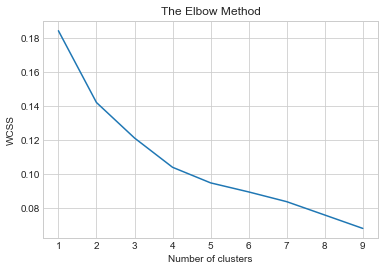

In [40]:
## Run k-Means multiple times in order to plot the Elbow Curve of WCSS

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42, n_init = 50)
    kmeans.fit(pivotTScaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As per the Elbow Curve, we can see a significant drop in the ** Within Cluster Sum of Errors (WCSS) ** as the cluster number increases from 1 to 4. However, when the 5th and subsequent clusters are created, the change in reduction of WCSS is not as significant. Therefore, we will only plot 4 clusters from the dataset.
The formation of 4 clusters also goes well with our hypothesis based on customer segments and their preferences.

In [67]:
## Plot kmeans of clusters = 4
kmeansFinal = KMeans(n_clusters = 4, init = 'k-means++', random_state = 69, n_init = 50)
kmeansFinal.fit(pivotTScaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=50, n_jobs=1, precompute_distances='auto',
    random_state=69, tol=0.0001, verbose=0)

# Step 3

In [68]:
kmeansFinal.labels_

array([1, 2, 2, 3, 3, 1, 1, 1, 2, 0, 1, 3, 1, 3, 2, 1, 2, 2, 1, 2, 0, 1,
       0, 1, 1, 0, 3, 2, 0, 3], dtype=int32)

In [69]:
## Add CLusters column next to each row in the Pivot Table
pivotTScaled['Clusters'] = kmeansFinal.labels_

In [70]:
bikeShopClusters = pivotTScaled
bikeShopClusters = bikeShopClusters.reset_index()
bikeShopClusters.head(5)

model,bikeshop.name,Bad Habit 1,Bad Habit 2,Beast of the East 1,Beast of the East 2,Beast of the East 3,CAAD Disc Ultegra,CAAD12 105,CAAD12 Black Inc,CAAD12 Disc 105,...,Trail 1,Trail 2,Trail 3,Trail 4,Trail 5,Trigger Carbon 1,Trigger Carbon 2,Trigger Carbon 3,Trigger Carbon 4,Clusters
category1,,Mountain,Mountain,Mountain,Mountain,Mountain,Road,Road,Road,Road,...,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,Mountain,
category2,,Trail,Trail,Trail,Trail,Trail,Elite Road,Elite Road,Elite Road,Elite Road,...,Sport,Sport,Sport,Sport,Sport,Over Mountain,Over Mountain,Over Mountain,Over Mountain,
frame,,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,...,Aluminum,Aluminum,Aluminum,Aluminum,Aluminum,Carbon,Carbon,Carbon,Carbon,
price,,high,low,high,low,low,low,low,high,low,...,low,low,low,low,low,high,high,high,high,
0,Albuquerque Cycles,0.017483,0.006993,0.01049,0.010490,0.003497,0.013986,0.006993,0.000000,0.013986,...,0.000000,0.003497,0.006993,0.017483,0.010490,0.006993,0.003497,0.006993,0.006993,1
1,Ann Arbor Speed,0.006645,0.009967,0.01495,0.009967,0.003322,0.026578,0.014950,0.016611,0.014950,...,0.009967,0.014950,0.009967,0.003322,0.011628,0.000000,0.000000,0.000000,0.011628,2
2,Austin Cruisers,0.008130,0.004065,0.00813,0.008130,0.000000,0.020325,0.020325,0.004065,0.024390,...,0.016260,0.016260,0.016260,0.008130,0.008130,0.000000,0.000000,0.000000,0.016260,2
3,Cincinnati Speed,0.005115,0.000000,0.00000,0.000000,0.000000,0.015345,0.010230,0.015345,0.007673,...,0.000000,0.002558,0.002558,0.002558,0.000000,0.010230,0.007673,0.010230,0.020460,3
4,Columbus Race Equipment,0.010152,0.000000,0.00000,0.005076,0.002538,0.010152,0.027919,0.027919,0.025381,...,0.002538,0.002538,0.005076,0.000000,0.000000,0.010152,0.005076,0.017766,0.005076,3


**Part I**

In [106]:
## Find and Merge Clusters Column with Bikeshop.Names column in order to visualize Bikeshops in each Cluster
bikeShopClusteredNames = pd.DataFrame(bikeShopClusters['bikeshop.name'])
bikeShopClusteredNumbers = pd.DataFrame(bikeShopClusters['Clusters'])
bikeShopClustered = bikeShopClusteredNames.merge(right = bikeShopClusteredNumbers, left_index = True, right_index = True)
bikeShopClustered.sort_values('Clusters')

,bikeshop.name,Clusters
22,Pittsburgh Mountain Machines,0
25,San Antonio Bike Shop,0
28,Tampa 29ers,0
20,Philadelphia Bike Shop,0
9,Ithaca Mountain Climbers,0
15,Minneapolis Bike Shop,1
12,Los Angeles Cycles,1
21,Phoenix Bi-peds,1
10,Kansas City 29ers,1
0,Albuquerque Cycles,1


In [91]:
## Create a dataframe of Cluster Centroids for each column mix
clusterCenters = pd.DataFrame(kmeansFinal.cluster_centers_)
clusterCenters = clusterCenters.T
clusterCenters.head(10)

,0,1,2,3
0,0.019905,0.012131,0.010127,0.005509
1,0.003562,0.014289,0.008157,0.000446
2,0.008350,0.014094,0.012970,0.000267
3,0.013737,0.013655,0.010810,0.002464
4,0.015062,0.010792,0.005640,0.001801
5,0.004871,0.011705,0.018546,0.012850
6,0.011148,0.012785,0.014615,0.013192
7,0.004118,0.004824,0.011152,0.019471
8,0.008541,0.015987,0.015795,0.014013
9,0.012817,0.008330,0.008316,0.016430


In [96]:
dfGroupedByProportionClusters = dfGroupedByProportion.reset_index()
dfGroupedByProportionClusters.drop(labels = ['bikeshop.name', 'quantity'], axis = 1, inplace = True)
dfGroupedByProportionClusters.head(10)

,model,category1,category2,frame,price
0,Bad Habit 1,Mountain,Trail,Aluminum,high
1,Bad Habit 2,Mountain,Trail,Aluminum,low
2,Beast of the East 1,Mountain,Trail,Aluminum,high
3,Beast of the East 2,Mountain,Trail,Aluminum,low
4,Beast of the East 3,Mountain,Trail,Aluminum,low
5,CAAD Disc Ultegra,Road,Elite Road,Aluminum,low
6,CAAD12 105,Road,Elite Road,Aluminum,low
7,CAAD12 Disc 105,Road,Elite Road,Aluminum,low
8,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,high
9,CAAD12 Red,Road,Elite Road,Aluminum,high


In [97]:
## Merge cluster centroids with column mix pivot table in order to identify common features of eachCluster

dfGroupedByProportionClusters = dfGroupedByProportionClusters.merge(right = clusterCenters, left_index = True, right_index = True)
dfGroupedByProportionClusters.head(10)

,model,category1,category2,frame,price,0,1,2,3
0,Bad Habit 1,Mountain,Trail,Aluminum,high,0.019905,0.012131,0.010127,0.005509
1,Bad Habit 2,Mountain,Trail,Aluminum,low,0.003562,0.014289,0.008157,0.000446
2,Beast of the East 1,Mountain,Trail,Aluminum,high,0.008350,0.014094,0.012970,0.000267
3,Beast of the East 2,Mountain,Trail,Aluminum,low,0.013737,0.013655,0.010810,0.002464
4,Beast of the East 3,Mountain,Trail,Aluminum,low,0.015062,0.010792,0.005640,0.001801
5,CAAD Disc Ultegra,Road,Elite Road,Aluminum,low,0.004871,0.011705,0.018546,0.012850
6,CAAD12 105,Road,Elite Road,Aluminum,low,0.011148,0.012785,0.014615,0.013192
7,CAAD12 Disc 105,Road,Elite Road,Aluminum,low,0.004118,0.004824,0.011152,0.019471
8,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,high,0.008541,0.015987,0.015795,0.014013
9,CAAD12 Red,Road,Elite Road,Aluminum,high,0.012817,0.008330,0.008316,0.016430


** Part II **

In [100]:
## Find out Top 10 models purchased of Cluster 0
dfGroupedByProportionClusters.sort_values(0, ascending = False).head(10)

,model,category1,category2,frame,price,0,1,2,3
97,CAAD8 Claris,Road,Elite Road,Aluminum,low,3.400000,-2.220446e-16,1.000000,2.000000
96,CAAD8 105,Road,Elite Road,Aluminum,low,0.026122,1.229485e-02,0.010230,0.015824
49,Slice Ultegra D12,Road,Triathalon,Carbon,high,0.022194,5.787823e-03,0.000800,0.012994
56,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,high,0.022181,1.216065e-02,0.022077,0.013370
0,Bad Habit 1,Mountain,Trail,Aluminum,high,0.019905,1.213089e-02,0.010127,0.005509
41,Scalpel-Si Carbon 3,Mountain,Cross Country Race,Carbon,high,0.019802,1.261450e-02,0.008188,0.007885
45,Slice 105,Road,Triathalon,Carbon,low,0.019790,5.086580e-03,0.002584,0.009272
39,Scalpel-Si 5,Mountain,Cross Country Race,Aluminum,high,0.018621,4.983989e-03,0.000744,0.010311
47,Slice Hi-Mod Dura Ace D12,Road,Triathalon,Carbon,high,0.017139,7.287150e-03,0.001271,0.011313
34,Jekyll Carbon 1,Mountain,Over Mountain,Carbon,high,0.016992,4.998825e-03,0.000528,0.007472


** Cluster 0 **
**Bike Category preference:** Road,
**Bike Category 2 preference:** Corss Country Race, Trialthon and Road bikes,
**Bike Frame preference:** Indifferent,
**Bike Price preference:** Indifferent but generally Higher priced

In [101]:
## Find out Top 10 models purchased of Cluster 1
dfGroupedByProportionClusters.sort_values(1, ascending = False).head(10)

,model,category1,category2,frame,price,0,1,2,3
21,F-Si 3,Mountain,Cross Country Race,Aluminum,low,0.009805,0.021705,0.015033,0.001495
18,Catalyst 4,Mountain,Sport,Aluminum,low,0.005962,0.019743,0.007307,0.000267
25,F-Si Hi-Mod Team,Mountain,Cross Country Race,Carbon,high,0.014219,0.017716,0.010026,0.000423
92,CAAD12 Disc 105,Road,Elite Road,Aluminum,low,0.015686,0.016265,0.007173,0.001337
14,CAAD8 Tiagra,Road,Elite Road,Aluminum,low,0.005117,0.016141,0.017489,0.013606
8,CAAD12 Disc Dura Ace,Road,Elite Road,Aluminum,high,0.008541,0.015987,0.015795,0.014013
12,CAAD8 Claris,Road,Elite Road,Aluminum,low,0.002739,0.015796,0.018970,0.014118
30,Habit 6,Mountain,Trail,Aluminum,low,0.012166,0.015531,0.004316,0.000000
74,Synapse Hi-Mod Disc Ultegra,Road,Endurance Road,Carbon,high,0.008554,0.015407,0.017782,0.009048
90,CAAD12 105,Road,Elite Road,Aluminum,low,0.006579,0.014985,0.008864,0.001718


** Cluster 1 **
**Bike Category preference:** Indifferent
**Bike Category 2 preference:** Race, Sport and Road bikes
**Bike Frame preference:** Aluminium
**Bike Price preference:** Low

In [102]:
## Find out Top 10 models purchased of Cluster 2
dfGroupedByProportionClusters.sort_values(2, ascending = False).head(10)

,model,category1,category2,frame,price,0,1,2,3
97,CAAD8 Claris,Road,Elite Road,Aluminum,low,3.400000,-2.220446e-16,1.000000,2.000000
82,Trigger Carbon 3,Mountain,Over Mountain,Carbon,high,0.004758,1.329165e-02,0.024608,0.008813
10,CAAD12 Ultegra,Road,Elite Road,Aluminum,low,0.009721,1.303762e-02,0.022889,0.021196
87,Beast of the East 2,Mountain,Trail,Aluminum,low,0.004916,1.370415e-02,0.022305,0.013462
56,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,high,0.022181,1.216065e-02,0.022077,0.013370
70,Synapse Disc 105,Road,Endurance Road,Aluminum,low,0.009581,1.327467e-02,0.021857,0.020187
80,Trigger Carbon 1,Mountain,Over Mountain,Carbon,high,0.008857,1.380453e-02,0.021122,0.009606
78,Trail 4,Mountain,Sport,Aluminum,low,0.004600,1.435912e-02,0.020372,0.011632
11,CAAD8 105,Road,Elite Road,Aluminum,low,0.004770,1.081141e-02,0.020073,0.010226
57,Supersix Evo Hi-Mod Utegra,Road,Elite Road,Carbon,high,0.013202,1.447566e-02,0.019531,0.017690


** Cluster 2 **
**Bike Category preference:** Indifferent
**Bike Category 2 preference:** Indifferent due to No strong prefernce of Road or Mountain bikes
**Bike Frame preference:** Aluminium mostly
**Bike Price preference:** Low

In [105]:
## Find out Top 10 models purchased of Cluster 3
dfGroupedByProportionClusters.sort_values(3, ascending = False).head(10)

,model,category1,category2,frame,price,0,1,2,3
97,CAAD8 Claris,Road,Elite Road,Aluminum,low,3.400000,-2.220446e-16,1.000000,2.000000
84,Bad Habit 1,Mountain,Trail,Aluminum,high,0.007428,6.898604e-03,0.011024,0.024675
54,Supersix Evo Black Inc.,Road,Elite Road,Carbon,high,0.010919,4.034531e-03,0.013543,0.023494
64,Synapse Carbon Disc 105,Road,Endurance Road,Carbon,low,0.008518,2.230432e-03,0.006798,0.023053
55,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,high,0.006218,5.413263e-03,0.010280,0.022961
86,Beast of the East 1,Mountain,Trail,Aluminum,high,0.008085,4.966190e-03,0.008991,0.021672
10,CAAD12 Ultegra,Road,Elite Road,Aluminum,low,0.009721,1.303762e-02,0.022889,0.021196
75,Synapse Hi-Mod Dura Ace,Road,Endurance Road,Carbon,high,0.009895,4.747295e-03,0.008274,0.020239
70,Synapse Disc 105,Road,Endurance Road,Aluminum,low,0.009581,1.327467e-02,0.021857,0.020187
67,Synapse Carbon Ultegra 3,Road,Endurance Road,Carbon,high,0.009045,4.388643e-03,0.012259,0.019819


** Cluster 3 **
**Bike Category preference:** Road
**Bike Category 2 preference:** Road or Trail
**Bike Frame preference:** Indifferent
**Bike Price preference:** Indifferent but mostly High